In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import time
import requests


In [2]:
# Data files
beers_data_path = "data/beers_kaggle.csv"
breweries_data_path = "data/breweries_kaggle.csv"
breweries_and_pubs_data_path = "data/craft_beer_dataworld.csv"
cities_population_data_path = "data/cities_population.csv"

# Read the beers and breweries files
beers_data = pd.read_csv(beers_data_path)
breweries_data = pd.read_csv(breweries_data_path)
b_and_p_data = pd.read_csv(breweries_and_pubs_data_path)
cities_pop = pd.read_csv(cities_population_data_path)


In [3]:
beers_data.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
beers_data.drop(["Unnamed: 0", "ibu", "id"], axis =1, inplace = True)

In [5]:
beers_data.head()

,abv,name,style,brewery_id,ounces
0,0.050,Pub Beer,American Pale Lager,408,12.0
1,0.066,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,Rise of the Phoenix,American IPA,177,12.0
3,0.090,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,Sex and Candy,American IPA,177,12.0


In [6]:
breweries_data.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [7]:
breweries_data.drop(["Unnamed: 0"], axis =1, inplace = True)

In [8]:
breweries_data.head()

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA


In [9]:
b_and_p_data.head()

,id,address,categories,city,country,hours,keys,latitude,longitude,menus,name,postalCode,province,twitter,websites
0,AVweN1T_ByjofQCxwSPL,Syr Airport,Brewery,Syracuse,US,NaN,us/ny/syracuse/syrairport/2098450797,NaN,NaN,NaN,Adirondack Pub,NaN,NY,NaN,NaN
1,AVwdkF9ZIN2L1WUfxDfw,1320 N Doctor Martin Luther King Dr,Office and Cafeteria Brewer's Hill,Milwaukee,US,NaN,us/wi/milwaukee/1320ndoctormartinlutherkingdr/...,NaN,NaN,NaN,The Waterfront Cafe,53212,WI,NaN,NaN
2,AVwdlPkf_7pvs4fz7TMr,608 4th St,Brewery Downtown Clovis,Clovis,US,"[{""day"":""Wed - Sat"",""hour"":""5:00 PM - 8:00 PM""}]",us/ca/clovis/6084thst/-932885010,NaN,NaN,NaN,559 Local Brewing,93612,CA,NaN,http://fresnobrewing.com
3,AVwcucY0kufWRAb5yWbU,1103 Mills St,breweries & brew pubs,Black Earth,US,NaN,us/wi/blackearth/1103millsst/-757413411,43.138995,-89.747904,NaN,Shack The,53515-9454,WI,NaN,NaN
4,AVweCkd5kufWRAb5_eaI,130 W Riverside Dr,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville,US,"[{""day"":""Wed - Thu"",""hour"":""3:00 PM - 9:00 PM""...",us/utica/jeffersonville/130wriversidedr/787280564,NaN,NaN,NaN,Flat12 Bierworks,47130,Utica,flat12bierwerks,http://flat12.me/brewery


In [10]:
b_and_p_data.drop(["id", "address", "country", "hours", "keys", "latitude", "longitude", "menus", "postalCode", "twitter", "websites"], axis =1, inplace = True)

In [11]:
b_and_p_data.head()

,categories,city,name,province
0,Brewery,Syracuse,Adirondack Pub,NY
1,Office and Cafeteria Brewer's Hill,Milwaukee,The Waterfront Cafe,WI
2,Brewery Downtown Clovis,Clovis,559 Local Brewing,CA
3,breweries & brew pubs,Black Earth,Shack The,WI
4,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville,Flat12 Bierworks,Utica


In [12]:
b_and_p_data['categories'].value_counts()

Brewers                                                                                             2727
Brewery                                                                                             2053
Wineries,Brewers                                                                                     325
Wineries,Vineyards,Brewers                                                                           322
Breweries,Food & Drink                                                                               270
                                                                                                    ... 
Breweries and brew pubs,Liquor stores,Restaurants,Pub restaurants,Brew Pubs,American Restaurants       1
Music Venue,Bars & Pubs,Pubs,Breweries,Bar                                                             1
Brewers,Wineries,Marketing Consultants,Conference Convention Centers                                   1
Brewery,Bar,Beer Garden,Brewery, Bar, and Beer Garden  

In [9]:
city_br = breweries_data.groupby(['city', 'state']).count()
city_br

,,name
city,state,
Abingdon,VA,1
Abita Springs,LA,1
Ada,MI,1
Afton,VA,1
Airway Heights,WA,1
...,...,...
Woodinville,WA,2
Worcester,MA,1
Yakima,WA,1


In [10]:
city_br = city_br.reset_index()

city_br.head()

,city,state,name
0,Abingdon,VA,1
1,Abita Springs,LA,1
2,Ada,MI,1
3,Afton,VA,1
4,Airway Heights,WA,1


In [11]:
city_br = city_br.loc[city_br["name"]>2]


In [12]:
city_br.head()

,city,state,name
5,Albuquerque,NM,3
7,Anchorage,AK,4
24,Austin,TX,8
26,Baltimore,MD,3
34,Bend,OR,6


In [13]:
cities_totals = city_br.sort_values('name', ascending=False)
cities_totals

,city,state,name
293,Portland,OR,11
47,Boulder,CO,9
73,Chicago,IL,9
320,Seattle,WA,9
24,Austin,TX,8
96,Denver,CO,8
313,San Diego,CA,8
34,Bend,OR,6
292,Portland,ME,6
314,San Francisco,CA,5


In [16]:
cities_totals.rename({'name':'Breweries', 'city':'City', 'state':'State'}, axis=1, inplace=True)
cities_totals

,City,State,Breweries
293,Portland,OR,11
47,Boulder,CO,9
73,Chicago,IL,9
320,Seattle,WA,9
24,Austin,TX,8
96,Denver,CO,8
313,San Diego,CA,8
34,Bend,OR,6
292,Portland,ME,6
314,San Francisco,CA,5


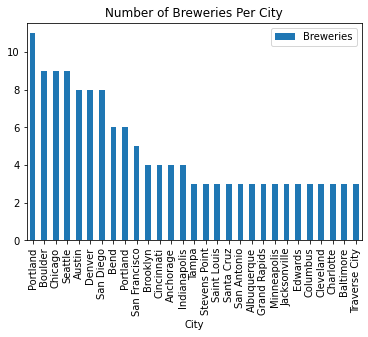

In [17]:
city_plot = cities_totals.plot.bar(x='City', y='Breweries', title = "Number of Breweries Per City")

In [15]:
cities_pop.head()

,Rank,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,"New York city, New York","8,175,133","8,175,031","8,190,209","8,272,948","8,346,693","8,396,091","8,433,806","8,463,049","8,469,153","8,437,478","8,390,081","8,336,817"
1,2,"Los Angeles city, California","3,792,621","3,793,139","3,795,512","3,820,876","3,851,202","3,881,622","3,909,901","3,938,568","3,963,226","3,975,788","3,977,596","3,979,576"
2,3,"Chicago city, Illinois","2,695,598","2,695,652","2,697,477","2,708,114","2,719,141","2,725,731","2,727,066","2,724,344","2,716,723","2,711,069","2,701,423","2,693,976"
3,4,"Houston city, Texas","2,099,451","2,095,517","2,100,280","2,126,032","2,161,593","2,199,391","2,241,826","2,286,908","2,309,544","2,316,750","2,318,573","2,320,268"
4,5,"Phoenix city, Arizona","1,445,632","1,446,691","1,449,038","1,469,796","1,499,274","1,526,491","1,555,445","1,583,690","1,612,199","1,633,560","1,654,675","1,680,992"


In [18]:
cities_pop['City'], cities_pop['State'] = cities_pop['Geographic Area'].str.split(',', 1).str

C:\Users\paul_\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [21]:
cities_pop.drop(["Geographic Area"], axis =1, inplace = True)

In [27]:
cities_pop['City'] = cities_pop['City'].str.replace("city", "")

In [28]:
cities_pop.head()

,Rank,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,City,State
0,1,"8,175,133","8,175,031","8,190,209","8,272,948","8,346,693","8,396,091","8,433,806","8,463,049","8,469,153","8,437,478","8,390,081","8,336,817",New York,New York
1,2,"3,792,621","3,793,139","3,795,512","3,820,876","3,851,202","3,881,622","3,909,901","3,938,568","3,963,226","3,975,788","3,977,596","3,979,576",Los Angeles,California
2,3,"2,695,598","2,695,652","2,697,477","2,708,114","2,719,141","2,725,731","2,727,066","2,724,344","2,716,723","2,711,069","2,701,423","2,693,976",Chicago,Illinois
3,4,"2,099,451","2,095,517","2,100,280","2,126,032","2,161,593","2,199,391","2,241,826","2,286,908","2,309,544","2,316,750","2,318,573","2,320,268",Houston,Texas
4,5,"1,445,632","1,446,691","1,449,038","1,469,796","1,499,274","1,526,491","1,555,445","1,583,690","1,612,199","1,633,560","1,654,675","1,680,992",Phoenix,Arizona


In [31]:
city_pop_2017 = cities_pop.loc[:, ["Rank", "City", "State", "2017"]]

In [33]:
city_pop_2017.head()

,Rank,City,State,2017
0,1,New York,New York,"8,437,478"
1,2,Los Angeles,California,"3,975,788"
2,3,Chicago,Illinois,"2,711,069"
3,4,Houston,Texas,"2,316,750"
4,5,Phoenix,Arizona,"1,633,560"
